# NN para la detección de estrés abiotico

In [49]:
import csv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import *
import tensorflow_addons as tfa
from keras.utils.vis_utils import plot_model
from tensorflow.keras import initializers
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay

In [50]:
path = "C:/data/"
df = pd.read_csv(path + "datosAFTRE243234.csv", sep='\t')
df=df.drop(columns=['Estrés'])
df.head()

,Preriodo,Nitrogeno,Fosforo,Calcio,Magnesio,Potasio,Umbral 0.5
0,01/01/2020,0.30,18.33,4.63,0.41,0.17,0
1,08/01/2020,0.26,27.90,8.57,0.68,0.16,0
2,15/01/2020,0.30,12.92,2.70,1.05,0.03,0
3,22/01/2020,0.17,49.47,6.23,0.73,0.07,0
4,29/01/2020,0.10,30.00,1.20,0.16,0.06,1


In [51]:
values = df["Umbral 0.5"].value_counts()
print(values)

0    133
1     15
Name: Umbral 0.5, dtype: int64


Text(1.28, 150, '10.100000000000001%')

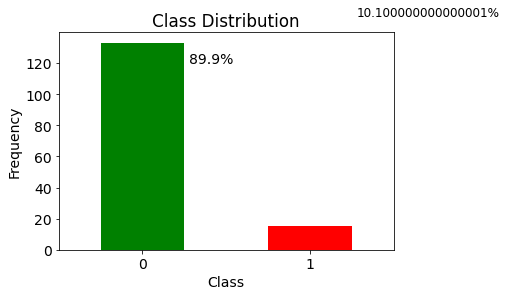

In [52]:
import matplotlib
font = {'size'   : 14}
matplotlib.rc('font', **font)


pd.value_counts(df["Umbral 0.5"]).plot.bar(rot=0, color=["green", "red"])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.text(0.28, 120,str(round(values[0]/(values[0]+values[1]),3)*100) + "%", fontsize=14)
plt.text(1.28, 150,  str(round(values[1]/(values[0]+values[1]),3)*100) + "%", fontsize=12)

## Checking missing attributes

In [53]:
def show_null(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    display(missing_data)
show_null(df)

,Total,Percent
Preriodo,0,0.0
Nitrogeno,0,0.0
Fosforo,0,0.0
Calcio,0,0.0
Magnesio,0,0.0
Potasio,0,0.0
Umbral 0.5,0,0.0


<ipython-input-54-937f5891fc29>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()
<ipython-input-54-937f5891fc29>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='BrBG', annot = True, fmt=".2f", annot_kws={"size":7})


Text(0.5, 1.0, 'Correlation Heatmap')

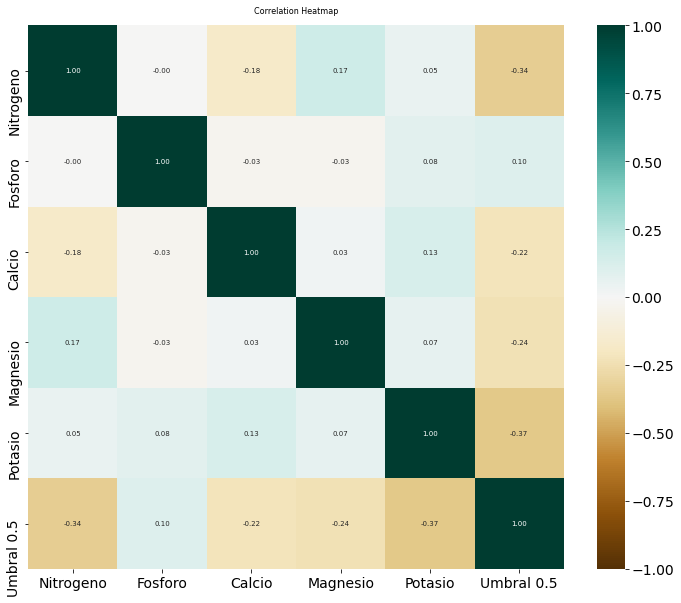

In [54]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='BrBG', annot = True, fmt=".2f", annot_kws={"size":7})
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':8}, pad=12)

## Training, testing

In [55]:
y = df["Umbral 0.5"]
y = y.astype(int)
X = df.iloc[:,1:-1]

In [56]:
print(X.shape, y.shape)

(148, 5) (148,)


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                test_size=0.3, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, 
                                                  test_size=0.2, random_state=0)
n_classes = 2


In [58]:
counts = np.bincount(y_train.values)
print(
    "Number of positive samples in training data: {} ({:.2f}% of total)".format(
        counts[1], 100 * float(counts[1]) / len(y_train)
    )
)

weight_for_0 = 1.0 / counts[0]
weight_for_1 = 1.0 / counts[1]

print("Weight class 0: ", weight_for_0,6)
print("Weight class 1: ", weight_for_1)

Number of positive samples in training data: 7 (8.54% of total)
Weight class 0:  0.013333333333333334 6
Weight class 1:  0.14285714285714285


# Deep Neural Network

In [59]:
from keras.layers import Dense, Dropout
from keras.models import Sequential
import tensorflow  as tf



model = Sequential()
#model.add(Dense(300,input_shape=(X_train.shape[1],), activation='relu')) bias_initializer='zeros'
#model.add(Dense(300,kernel_initializer='random_normal', input_shape=(X_train.shape[1],), activation='relu'))
#model.add(Dense(150, activation = "relu"))
#model.add(Dense(100, activation = "relu"))
#model.add(Dense(50, activation = "relu"))
#model.add(Dense(1, activation='sigmoid'))

model.add(Dense(5,kernel_initializer='random_normal', input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(200, activation = "relu"))
model.add(Dense(150, activation = "relu"))
model.add(Dense(100, activation = "relu"))
model.add(Dense(30, activation = "relu"))
model.add(Dense(1, activation='sigmoid'))


model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 5)                 30        
                                                                 
 dense_19 (Dense)            (None, 200)               1200      
                                                                 
 dense_20 (Dense)            (None, 150)               30150     
                                                                 
 dense_21 (Dense)            (None, 100)               15100     
                                                                 
 dense_22 (Dense)            (None, 30)                3030      
                                                                 
 dense_23 (Dense)            (None, 1)                 31        
                                                                 
Total params: 49,541
Trainable params: 49,541
Non-trai

In [60]:
metrics_m = [
    tf.keras.metrics.FalseNegatives(name="fn"),
    tf.keras.metrics.FalsePositives(name="fp"),
    tf.keras.metrics.TrueNegatives(name="tn"),
    tf.keras.metrics.TruePositives(name="tp"),
    tf.keras.metrics.Precision(name="precision"),
    tf.keras.metrics.Recall(name="recall"),
]

model.compile(optimizer=Adam(),
               loss='binary_crossentropy',
               metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

history = model.fit(X_train, y_train, epochs=15, 
                    verbose=1,
                    batch_size=10,
                    validation_data = (X_val, y_val))



Epoch 1/15
9/9 [==============================] - 1s 42ms/step - loss: 0.3989 - accuracy: 0.9146 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00 - val_loss: 0.2838 - val_accuracy: 0.9048 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 2/15
9/9 [==============================] - 0s 4ms/step - loss: 0.3209 - accuracy: 0.9146 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00 - val_loss: 0.2847 - val_accuracy: 0.9048 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 3/15
9/9 [==============================] - 0s 5ms/step - loss: 0.3207 - accuracy: 0.9146 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00 - val_loss: 0.2798 - val_accuracy: 0.9048 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 4/15
9/9 [==============================] - 0s 5ms/step - loss: 0.3071 - accuracy: 0.9146 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00 - val_loss: 0.2831 - val_accuracy: 0.9048 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 5/15
9/9 [=======

In [61]:
def show_history(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    plt.figure()
    plt.plot(train_loss,'r', label="train")
    plt.plot(val_loss,'g', label="validation")
    plt.legend()
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.show()
    
    
def show_metrics(y_pred,th):
    cm = confusion_matrix(y_test, y_pred>th)
    print(cm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-estrés", "estrés"])
    disp.plot(cmap=plt.cm.Blues)
    plt.show()
    d = classification_report(y_test, y_pred > th,output_dict=True)
    display(pd.DataFrame.from_dict(d))
    return y_pred

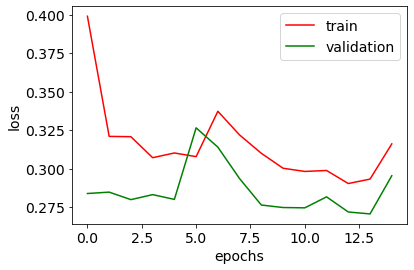

In [62]:
show_history(history)

2/2 [==============================] - 0s 983us/step
[[39  0]
 [ 6  0]]


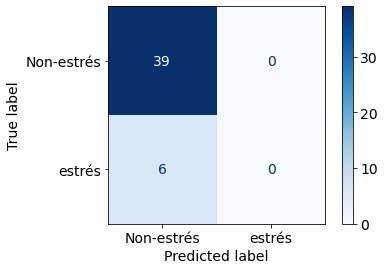

c:\Users\pablo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0,1,accuracy,macro avg,weighted avg
precision,0.866667,0.0,0.866667,0.433333,0.751111
recall,1.000000,0.0,0.866667,0.500000,0.866667
f1-score,0.928571,0.0,0.866667,0.464286,0.804762
support,39.000000,6.0,0.866667,45.000000,45.000000


array([[0.19050151],
       [0.15658638],
       [0.15473928],
       [0.1171463 ],
       [0.25915664],
       [0.14554541],
       [0.29570034],
       [0.22674908],
       [0.20662217],
       [0.07932263],
       [0.17121392],
       [0.27449495],
       [0.18554741],
       [0.09983685],
       [0.08930071],
       [0.262384  ],
       [0.13056529],
       [0.16986327],
       [0.21546863],
       [0.09561618],
       [0.14300625],
       [0.20871852],
       [0.20956337],
       [0.18344414],
       [0.1280058 ],
       [0.0838488 ],
       [0.1445805 ],
       [0.15489869],
       [0.24546608],
       [0.1421367 ],
       [0.22521055],
       [0.0711834 ],
       [0.20007418],
       [0.09118222],
       [0.10481272],
       [0.24585426],
       [0.15188238],
       [0.1878197 ],
       [0.14831612],
       [0.09688716],
       [0.2634254 ],
       [0.17063336],
       [0.2676762 ],
       [0.16807143],
       [0.25043216]], dtype=float32)

In [63]:
y_pred = model.predict(X_test)
show_metrics(y_pred,.3)

In [64]:
y_pred

array([[0.19050151],
       [0.15658638],
       [0.15473928],
       [0.1171463 ],
       [0.25915664],
       [0.14554541],
       [0.29570034],
       [0.22674908],
       [0.20662217],
       [0.07932263],
       [0.17121392],
       [0.27449495],
       [0.18554741],
       [0.09983685],
       [0.08930071],
       [0.262384  ],
       [0.13056529],
       [0.16986327],
       [0.21546863],
       [0.09561618],
       [0.14300625],
       [0.20871852],
       [0.20956337],
       [0.18344414],
       [0.1280058 ],
       [0.0838488 ],
       [0.1445805 ],
       [0.15489869],
       [0.24546608],
       [0.1421367 ],
       [0.22521055],
       [0.0711834 ],
       [0.20007418],
       [0.09118222],
       [0.10481272],
       [0.24585426],
       [0.15188238],
       [0.1878197 ],
       [0.14831612],
       [0.09688716],
       [0.2634254 ],
       [0.17063336],
       [0.2676762 ],
       [0.16807143],
       [0.25043216]], dtype=float32)